In [ ]:
!pip install pandas numpy matplotlib

In [ ]:
!pip install statsmodels pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
np.random.seed(2704)
t = np.arange(1,41)
sales = 50 + 2 * t + np.random.normal(0,10,40) # constant + 2 * time + bayesian random generated number
index = pd.period_range(start="2015Q1", periods=40, freq="Q")
df = pd.DataFrame({"sales":sales}, index=index)
df["t"]=t


In [ ]:
print(df.head())

            sales  t
2015Q1  54.836531  1
2015Q2  29.724529  2
2015Q3  55.300048  3
2015Q4  58.973411  4
2016Q1  53.685997  5


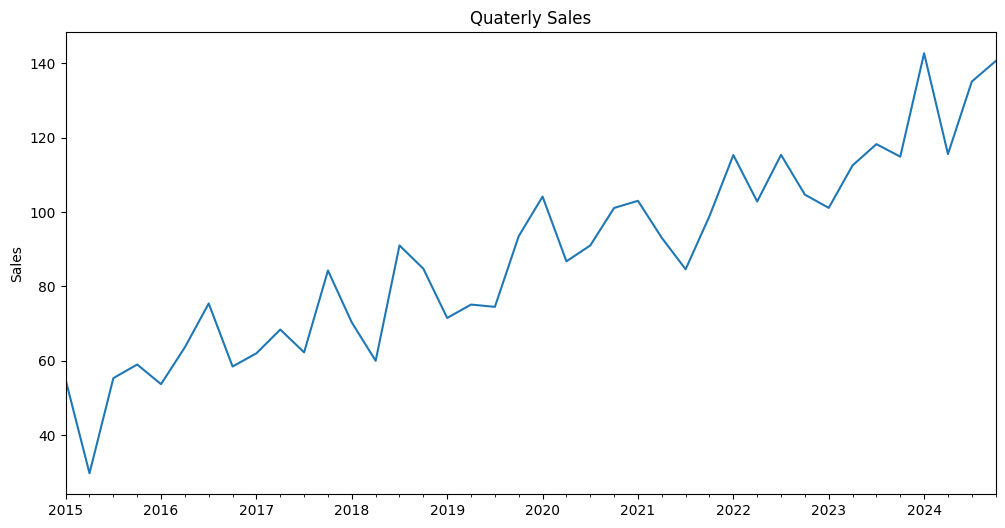

In [ ]:
plt.figure(figsize=(12, 6))
df["sales"].plot(title="Quaterly Sales")
plt.ylabel("Sales")
plt.show()

In [ ]:
import statsmodels.api as sm
y= df["sales"]
x=sm.add_constant(df['t'])
model = sm.OLS(y, x).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     246.9
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           3.28e-18
Time:                        22:07:16   Log-Likelihood:                -146.52
No. Observations:                  40   AIC:                             297.0
Df Residuals:                      38   BIC:                             300.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5236      3.118     14.600      0.0

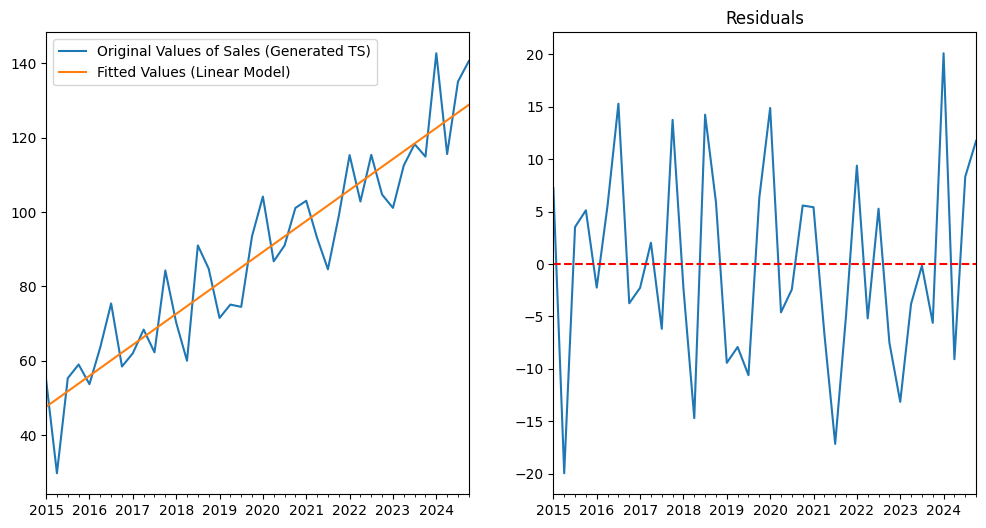

In [ ]:
df['fitted']=model.fittedvalues
df['residuals']=model.resid
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
df['sales'].plot(ax=ax1, label="Original Values of Sales (Generated TS)")
df["fitted"].plot(ax=ax1, label="Fitted Values (Linear Model)")
ax1.legend()

df['residuals'].plot(ax=ax2, title='Residuals')
ax2.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
t_forecast = np.arange(41,49)
x_forecast = sm.add_constant(t_forecast)
forecast = model.predict(x_forecast)
forecast_index=pd.period_range(start="2016Q1", periods=8, freq="Q")
df_forecast = pd.DataFrame({"forecast":forecast}, index=forecast_index)
print(df_forecast)


          forecast
2016Q1  130.899903
2016Q2  132.982252
2016Q3  135.064602
2016Q4  137.146951
2017Q1  139.229300
2017Q2  141.311650
2017Q3  143.393999
2017Q4  145.476348
